### Muhammad Abdul Nafay
### 19P-0117
### Question#02
Implement  an Artificial Neural  Network (ANN) based classifier that takes as input a  100x100 
binary image (you may generate images in paint).  
1. The  input  array  should  contain  upper  case  English  alphabets  (A  to  Z)  written  in 
different patterns (rotated/scaled/tilted etc.).  
2. Each  alphabet  should  have  at  least  10  training  examples  in  the  training  data  (so  you 
have to create a total of 26x10 = 260 training examples). 
3. Your ANN classifier should find a weight vector that can be used to classify patterns of 
this type. 
4. Number  of  input,  output,  and  hidden  layer  size  will  be  your  choice  and  you  should 
provide justification for that. Try to be simple in your design. 
5. Test your classifier on previously unseen images and report accuracy.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


In [17]:
image_size = (100, 100) #100X100 image size
batch_size = 26 #26 alphabets so, each batch size is 26

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alphabets",
    validation_split=0.2,
    subset="training",
    seed=1500,
    image_size=image_size,
    batch_size=batch_size,
)


Found 260 files belonging to 26 classes.
Using 208 files for training.


In [18]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "Alphabets",
    validation_split=0.2,
    subset="validation",
    seed=500,
    image_size=image_size,
    batch_size=batch_size)


Found 260 files belonging to 26 classes.
Using 52 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)
print("First Class: ", class_names[0])
print("Last Class: ", class_names[25])



['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
First Class:  A
Last Class:  Z


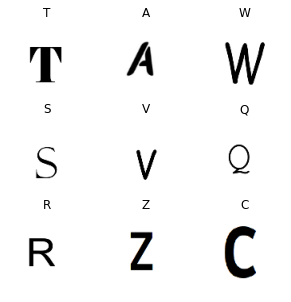

In [6]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [8]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(1000, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(500, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(250, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes)
])


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 1000)    28000     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 1000)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 500)       4500500   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 500)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 250)       1

In [11]:
#Running this cell will take some time
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15 #15 epoches
)


Epoch 1/15
8/8 [==============================] - 118s 14s/step - loss: 3.8102 - accuracy: 0.0192 - val_loss: 3.2562 - val_accuracy: 0.0192
Epoch 2/15
8/8 [==============================] - 108s 14s/step - loss: 3.2593 - accuracy: 0.0673 - val_loss: 3.2397 - val_accuracy: 0.0577
Epoch 3/15
8/8 [==============================] - 110s 14s/step - loss: 3.2019 - accuracy: 0.0817 - val_loss: 3.0270 - val_accuracy: 0.1154
Epoch 4/15
8/8 [==============================] - 111s 14s/step - loss: 2.7030 - accuracy: 0.2212 - val_loss: 2.1841 - val_accuracy: 0.4038
Epoch 5/15
8/8 [==============================] - 110s 14s/step - loss: 1.8012 - accuracy: 0.4904 - val_loss: 1.1159 - val_accuracy: 0.7308
Epoch 6/15
8/8 [==============================] - 110s 14s/step - loss: 1.0766 - accuracy: 0.6875 - val_loss: 0.8456 - val_accuracy: 0.8077
Epoch 7/15
8/8 [==============================] - 114s 14s/step - loss: 0.5034 - accuracy: 0.8413 - val_loss: 0.5375 - val_accuracy: 0.8654
Epoch 8/15
8/8 [====

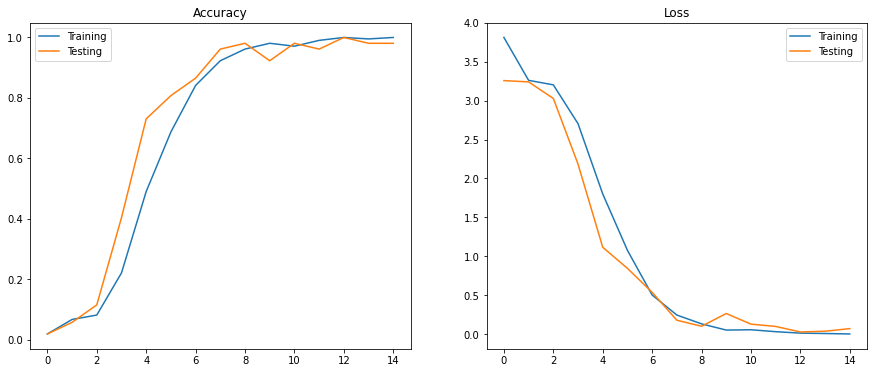

In [14]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['accuracy'], label='Training')
plt.plot(history.epoch, history.history['val_accuracy'], label='Testing')

plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['loss'], label='Training')
plt.plot(history.epoch, history.history['val_loss'], label='Testing')

plt.title("Loss")
plt.legend()
plt.show()
